In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import  image

In [3]:
Train_path = "/content/drive/My Drive/CovidDataset/Train"
Val_path = "/content/drive/My Drive/CovidDataset/Validation"

In [4]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [6]:
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 463 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [9]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/CovidDataset/Validation',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 92 images belonging to 2 classes.


In [10]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [11]:
hist= model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 66s 8s/step - loss: 1.2685 - accuracy: 0.6151 - val_loss: 0.6743 - val_accuracy: 0.5781
Epoch 2/10
8/8 [==============================] - 65s 8s/step - loss: 0.6364 - accuracy: 0.6695 - val_loss: 0.6828 - val_accuracy: 0.4375
Epoch 3/10
8/8 [==============================] - 70s 9s/step - loss: 0.6016 - accuracy: 0.7266 - val_loss: 0.6302 - val_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 70s 9s/step - loss: 0.5090 - accuracy: 0.7148 - val_loss: 0.5207 - val_accuracy: 0.8438
Epoch 5/10
8/8 [==============================] - 70s 9s/step - loss: 0.4014 - accuracy: 0.7344 - val_loss: 0.3005 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 67s 8s/step - loss: 0.2747 - accuracy: 0.8326 - val_loss: 0.2253 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 71s 9s/step - loss: 0.1826 - accuracy: 0.9180 

In [12]:
# Classactivationmaps
# grad-cam

In [13]:
model.save("covid_model.h5")

In [14]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.196827232837677, 0.9395248293876648]

In [15]:
model.evaluate_generator(validation_generator)

[0.18404877185821533, 0.967391312122345]

In [16]:
model=load_model("/content/drive/My Drive/CovidDataset/covid_model.h5")

In [17]:
import os

In [18]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [19]:
y_actual=[]
y_test=[]

In [20]:
for i in os.listdir("/content/drive/My Drive/CovidDataset/Validation/Normal"):
    img = image.load_img("/content/drive/My Drive/CovidDataset/Validation/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
for i in os.listdir("/content/drive/My Drive/CovidDataset/Validation/Covid"):
    img = image.load_img("/content/drive/My Drive/CovidDataset/Validation/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [22]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_actual,y_test)

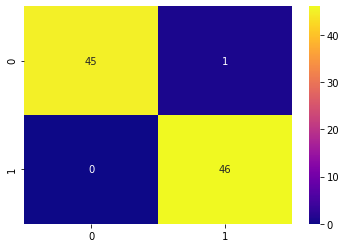

In [25]:
sns.heatmap(cm, cmap="plasma", annot=True)

In [26]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [27]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [28]:
import cv2

In [29]:
img_dims = (224,224,3)

In [30]:
import tensorflow as tf

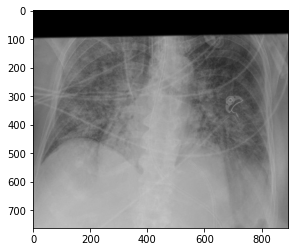

In [31]:
image3 = cv2.imread("/content/drive/My Drive/CovidDataset/Train/Covid/16660_3_1.jpg")
plt.imshow(image3)

In [32]:
image3 = cv2.resize(image3,(img_dims[0],img_dims[1]))
image3= image3.astype('float')/ 255.0
image3 = np.array(image3)
image3 = np.expand_dims(image3, axis=0)
result3 = model.predict(image3)
result3[0, :] = result3[0, :] > 0.5 
if (result3 == 0):
  print("COVID POSITIVE")
else:
  print("COVID NEGATIVE")

COVID POSITIVE


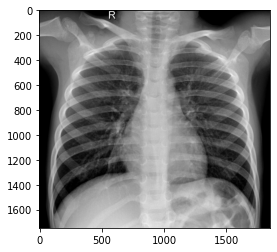

In [33]:
image4 = cv2.imread("/content/drive/My Drive/CovidDataset/Train/Normal/IM-0451-0001.jpeg")
plt.imshow(image4)

In [34]:
image4 = cv2.resize(image4,(img_dims[0],img_dims[1]))
image4= image4.astype('float')/ 255.0
image4 = np.array(image4)
image4 = np.expand_dims(image4, axis=0)
result4 = model.predict(image4)
result4[0, :] = result4[0, :] > 0.5 
if (result4 == 0):
  print("COVID POSITIVE")
else:
  print("COVID NEGATIVE")

COVID NEGATIVE


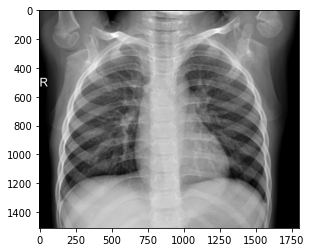

In [35]:
image5 = cv2.imread("/content/drive/My Drive/CovidDataset/Train/Normal/IM-0629-0001-0002.jpeg")
plt.imshow(image5)

In [36]:
image5 = cv2.resize(image5,(img_dims[0],img_dims[1]))
image5= image5.astype('float')/ 255.0
image5 = np.array(image5)
image5= np.expand_dims(image5, axis=0)
result5 = model.predict(image5)
result5[0, :] = result5[0, :] > 0.5 
if (result5 == 0):
  print("COVID POSITIVE")
else:
  print("COVID NEGATIVE")

COVID NEGATIVE


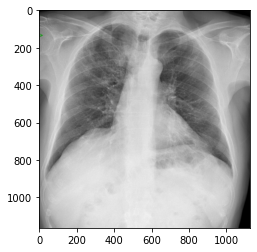

In [37]:
image6 = cv2.imread("/content/drive/My Drive/CovidDataset/Train/Covid/covid-19-infection-exclusive-gastrointestinal-symptoms-pa.png")
plt.imshow(image6)

In [38]:
image6 = cv2.resize(image6,(img_dims[0],img_dims[1]))
image6= image6.astype('float')/ 255.0
image6 = np.array(image6)
image6= np.expand_dims(image6, axis=0)
result6 = model.predict(image6)
result6[0, :] = result6[0, :] > 0.5 
if (result6 == 0):
  print("COVID POSITIVE")
else:
  print("COVID NEGATIVE")

COVID POSITIVE


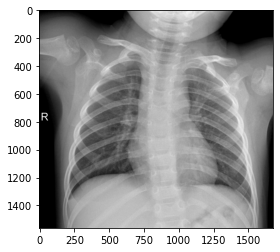

In [39]:
image7 = cv2.imread("/content/drive/My Drive/CovidDataset/Train/Normal/IM-0478-0001.jpeg")
plt.imshow(image7)

In [40]:
image7 = cv2.resize(image7,(img_dims[0],img_dims[1]))
image7= image7.astype('float')/ 255.0
image7 = np.array(image7)
image7= np.expand_dims(image7, axis=0)
result7 = model.predict(image7)
result7[0, :] = result7[0, :] > 0.5                                            
if (result7 == 0):
  print("COVID POSITIVE")
else:
  print("COVID NEGATIVE")

COVID NEGATIVE
